**Neural Network classfication in Tensorflow**

creating a Data to view and fit it 

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
print(tf.__version__)    # version check

2.8.0


In [ ]:
from sklearn.datasets import make_circles
# make 1000 examples
n_samples = 1000

#create circles
x, y  =make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
# check out the feature
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# see the labels first 10 
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# make a dataframe of feature and lables
import pandas as pd
circles = pd.DataFrame({'x0':x[:,0],'x1':x[:,1],'label':y})
circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
# Check out he different lables 
circles['label'].value_counts()    # this o/p -0,1 means we are dealing with binary classification

1    500
0    500
Name: label, dtype: int64

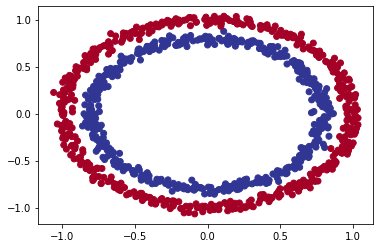

In [ ]:
# visualize a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.show()                    # my model say each color belong to diff category i. e - binary classification.

**Input and Output shape**

In [ ]:
# check the shapes of our feature and model
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Check how many sample we have 
len(x), len(y)

(1000, 1000)

In [ ]:
# View the first example of features
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

**Steps in Modelling** :-
1. Create a model
2. Compile a model
3. Evaluate a model
4. Fit a model

Building model 1

In [ ]:
# set random seed
tf.random.set_seed(42)

# Creating a model using sequential api(i.e- Keras)
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)                                              
                              ])

# Compile a model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(), # SGD = gradiant descent
                metrics = ['accuracy'])

# Fir the model
model_1.fit(x,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Train our model for longer
model_1.fit(x,y, epochs=200, verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Building model 2

In [ ]:
# set random seed
tf.random.set_seed(42)

# Creating a model using sequential api(i.e- Keras)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),  # adding one layer
                               tf.keras.layers.Dense(1)   # add 2nd layer                                           
                              ])

# Compile a model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(), # SGD = gradiant descent
                metrics = ['accuracy'])

# Fir the model
model_2.fit(x,y, epochs=100, verbose=0)

In [ ]:
# Evaluate a model
model_2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

need to improve a model bcoz both model is giving same result

**Improving a model**

adding neurons also

In [ ]:
# set random seed
tf.random.set_seed(42)

# Creating a model using sequential api(i.e- Keras)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, input_shape=(None, 1)),  # adding one layer , # 100 -adding neurons
                               tf.keras.layers.Dense(10),   # add 2nd layer 
                               tf.keras.layers.Dense(1)     # add 3rd layer                                     
                              ])

# Compile a model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), # SGD = gradiant descent
                metrics = ['accuracy'])

# Fir the model
model_3.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.3571 - accuracy: 0.4968
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.4915
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5044
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4928
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4865
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5131
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4978
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4926
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5023
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5089
Epoch 11/

In [ ]:
import numpy as np
def plot_decision_boundary(model,x,y):

  # define the axis boundaries of a plot and create a meshgrid
  x_min, x_max = x[:,0].min() - .1, x[:,0].max()+.1
  y_min, y_max = x[:,1].min() - .1, x[:,1].max()+.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create x values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make prediction using the trained model
  y_pred = model.predict(x_in) 

  # Check for Multi-class  
  if len(y_pred[0])>1:
    print('Doing multiclass classification..')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('Doing binary classification..')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing multiclass classification..


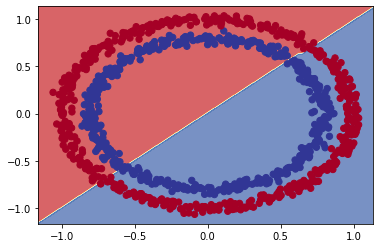

In [ ]:
# Check out the prediction of model is making
plot_decision_boundary(model_3,x,y)             # it look like model trying to draw a straight line

the main issue is data is not separable by a straight line.

**Now, trying to do regression model.**

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model
x_regression = np.arange(0,1000, 5)
y_regression = np.arange(0, 1000, 5)

# split into a training and test dataset
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]  

# Fit the model to data
model_3.fit(tf.expand_dims(x_reg_train, axis= -1), y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: -3111.7009 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: -5629.4053 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: -5637.6602 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: -5665.0918 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: -5665.0923 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: -5665.0923 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: -5665.0918 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: -5665.0918 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: -5665.0923 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s

In [ ]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, None, 100)         200       
                                                                 
 dense_14 (Dense)            (None, None, 10)          1010      
                                                                 
 dense_15 (Dense)            (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set up random model
tf.random.set_seed(42)

# Re-create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
                             ])

# Change the loss and metrics of our compiled model

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# Fit the comliled model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1),
            y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 148.2158 - mae: 148.2158
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 40.6552 - mae: 40.6552
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 28.4548 - mae: 28.4548
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 13.7264 - mae: 13.7264
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 24.5753 - mae: 24.5753
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 10.4157 - mae: 10.4157
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 9.1379 - mae: 9.1379
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 9.2649 - mae: 9.2649
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 5.0359 - mae: 5.0359
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 3.1257 - mae: 3.1257
Epoch 11/100
5/5 [==============================] - 0s 3ms/step -

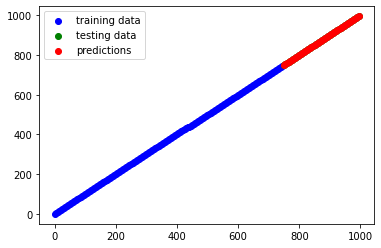

In [ ]:
# make predictions with our trained model:
y_reg_preds = model_3.predict(y_reg_test)

# plot the model prediction against our regression model:
plt.scatter(x_reg_train, y_reg_train, c = 'b', label = 'training data')
plt.scatter(x_reg_test, y_reg_test, c = 'g', label = 'testing data')
plt.scatter(x_reg_test, y_reg_preds.squeeze(), c = 'r', label = 'predictions')
plt.legend();

here, we see testing and prediction are exactly the same here.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
                               tf.keras.layers.Dense(1)
                              ])

# Compile the model
model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=.001),
                metrics = ['accuracy']
               )

# Fit the model
history =  model_4.fit(x,y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3804 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2279 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7024 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 2.4002 - accuracy: 0.5000
Epoch 11/

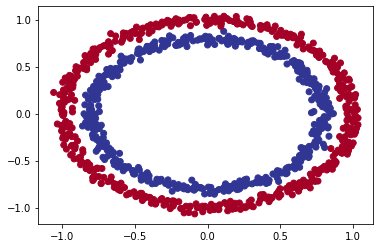

In [ ]:
# Check out our data
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

Doing binary classification..


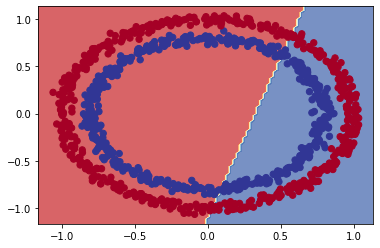

In [ ]:
# check the decision boundary
plot_decision_boundary(model_4, x, y)

Will add some linearity to model by changing it to another activation function

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1)
                              ])

# Compile the model
model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=.001),
                metrics = ['accuracy']
               )

# Fit the model
history =  model_5.fit(x,y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 11/100
32/32 [=

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1),
                              ])

# Compile the model
model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=.001),
                metrics = ['accuracy']
               )

# Fit the model
history =  model_6.fit(x,y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/100
32/32 [=

our model is till not good bcoz accuracy is still = 50%

Doing binary classification..


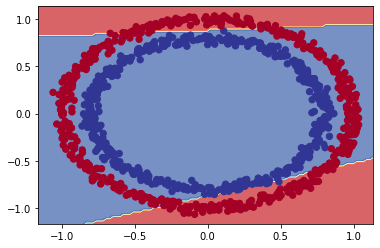

In [ ]:
# Check the predictions using 2 hidden layer
plot_decision_boundary(model_6,x,y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
                              ])

# Compile the model
model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=.001),
                metrics = ['accuracy']
               )

# Fit the model
history =  model_7.fit(x,y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [=

In this, we are getting good accuracy i.e - 98%.

In [ ]:
# Evaluate the model
model_7.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Doing binary classification..


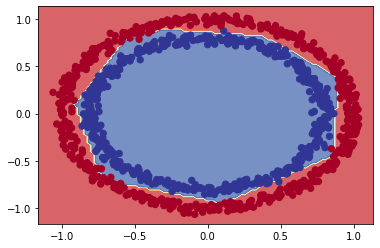

In [ ]:
# View the prediction of the model with Relu and Sigmoid activation function
plot_decision_boundary(model_7,x,y)                       # this is the classification model

This is combination of linear and non-linear function - that helps in finding pattern from data.


What power the layer in the model we have just built through we are able to classify the model?

Ans - we can create tensor 

In [ ]:
# Create a toy tensor
a = tf.cast(tf.range(-10, 10), tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

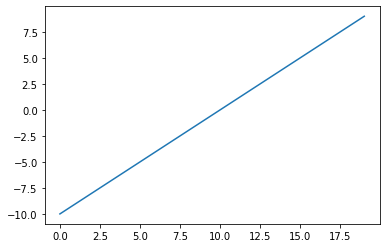

In [ ]:
plt.plot(a)
plt.show()

Will create a sigmoid function.

In [ ]:
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

sigmoid(a)    # this is sigmoid of 'a' tensor we created

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

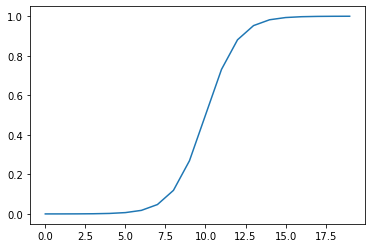

In [ ]:
plt.plot(sigmoid(a))

In [ ]:
def relu(x):
  return tf.maximum(0,x)

relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

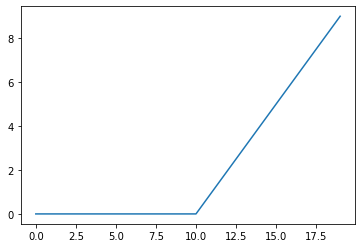

In [ ]:
plt.plot(relu(a))     # this is non-straight line

In [ ]:
# want to check linear function

tf.keras.activations.linear(a)   # it's giving the same o/p like we created normal tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
a == tf.keras.activations.linear(a)   # checking comparison

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Now, we can evaluate and improve our model.

**Evaluating and Improving our classification model**

In [ ]:
len(x)

1000

In [ ]:
# split data into train and test
x_train, y_train = x[:800], y[:800]    # 80% of training data
x_test, y_test = x[800:], y[800:]

x_train.shape, x_test.shape

((800, 2), (200, 2))

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
                              ])

# Compile the model
model_8.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=.01),
                metrics = ['accuracy']
               )

# Fit the model
history =  model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [ ]:
# evaluate our model on the test set

loss, accuracy = model_8.evaluate(x_test, y_test)
print(f'Model loss on the test set : {loss}')
print(f'Model accuracy on the test set : {100*accuracy:.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000
Model loss on the test set : 0.12468849867582321
Model accuracy on the test set : 100.00%


Doing binary classification..
Doing binary classification..


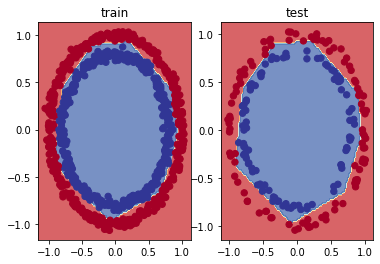

In [ ]:
# plot the decision boundaries for the train and test set:

plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_8, x = x_train, y = y_train)

plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_8, x = x_test, y = y_test)

plt.show()

Doing binary classification..
Doing binary classification..


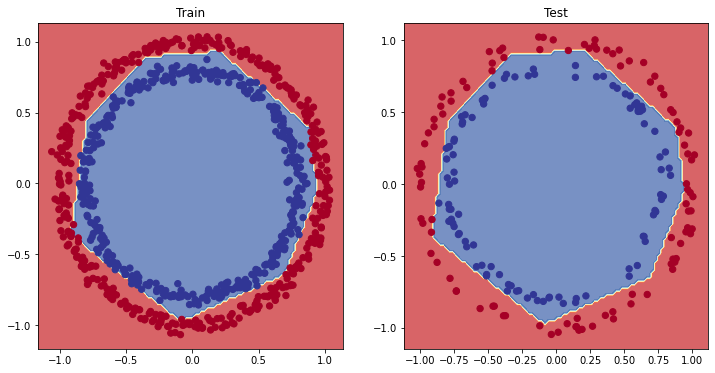

In [177]:
# Plot the decision boundaries for the training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, x=x_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8, x=x_test, y=y_test)
plt.show()

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 training curves')

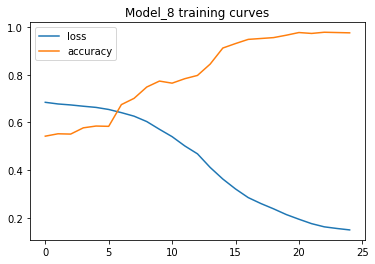

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 training curves')

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
                              ])

# Compile the model
model_9.compile(loss = 'binary_crossentropy', # we can use strings here too
                optimizer = 'Adam',# same as tf.keras.optimizers.Adam() with defualt settings
                metrics = ['accuracy']
               )

# Create a learning rate scheduler callback - if model achieve learning rate then it stop there 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))    # learning rate values 

# Fit the model
history =  model_9.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

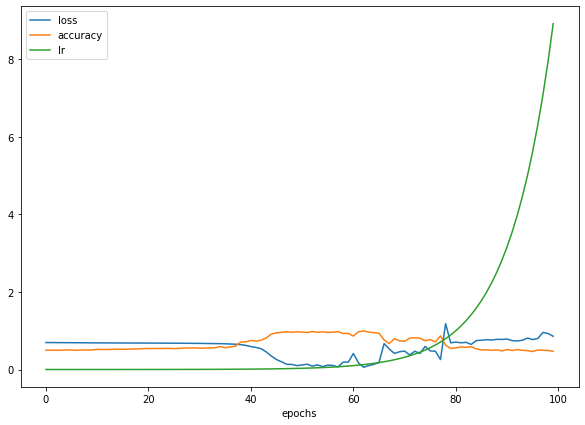

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs')

In [ ]:
lrs.shape

(5,)

Text(0.5, 1.0, 'Learning rate vs loss')

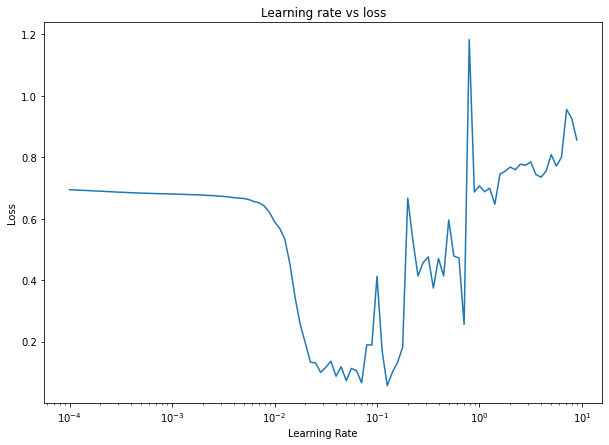

In [ ]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])  # we want the x-axis(learning -rate) to be log
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss')

In [ ]:
# Exmaple of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
                              ])

# Compile the model
model_10.compile(loss = 'binary_crossentropy', # we can use strings here too
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics = ['accuracy']
               )

# Fit the model
history =  model_10.fit(x_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [ ]:
# Evaluate model on the test dataset
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

Doing binary classification..
Doing binary classification..


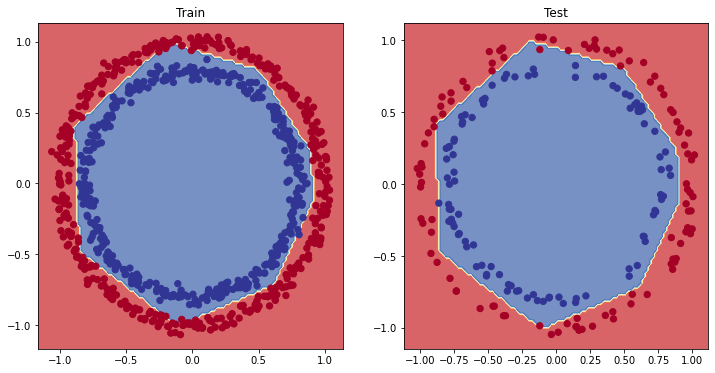

In [ ]:
# Plot the decision boundaries for the training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10, x=x_test, y=y_test)
plt.show()

In [ ]:
# Check the accuracy of our model

loss, accuracy = model_10.evaluate(x_test, y_test)
print(f'Model loss on the test set : {loss}')
print(f'Model accuracy on the test set : {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set : 0.05740184709429741
Model accuracy on the test set : 99.00%


In [ ]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix

# make prediction
y_preds = model_10.predict(x_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [ ]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

In [ ]:
y_preds

array([[9.85265374e-01],
       [9.99237895e-01],
       [9.90323484e-01],
       [9.97069418e-01],
       [3.96229774e-01],
       [1.81269348e-02],
       [9.68290687e-01],
       [1.97467208e-02],
       [9.99671698e-01],
       [5.64604998e-04],
       [9.72873628e-01],
       [2.71522194e-01],
       [9.92272019e-01],
       [9.27265525e-01],
       [9.98101592e-01],
       [9.91818786e-01],
       [9.91739690e-01],
       [9.33626771e-01],
       [4.25938964e-02],
       [9.91493583e-01],
       [1.49991810e-02],
       [9.32794929e-01],
       [9.92896199e-01],
       [9.73198414e-01],
       [4.26525003e-05],
       [9.21439886e-01],
       [9.65749145e-01],
       [2.41607308e-01],
       [1.93991065e-02],
       [9.98130977e-01],
       [1.44242942e-02],
       [9.44148898e-01],
       [9.86896753e-01],
       [1.23808295e-01],
       [2.88016796e-02],
       [9.63382125e-01],
       [9.98146296e-01],
       [9.63414907e-01],
       [9.95050430e-01],
       [9.88492191e-01],


In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

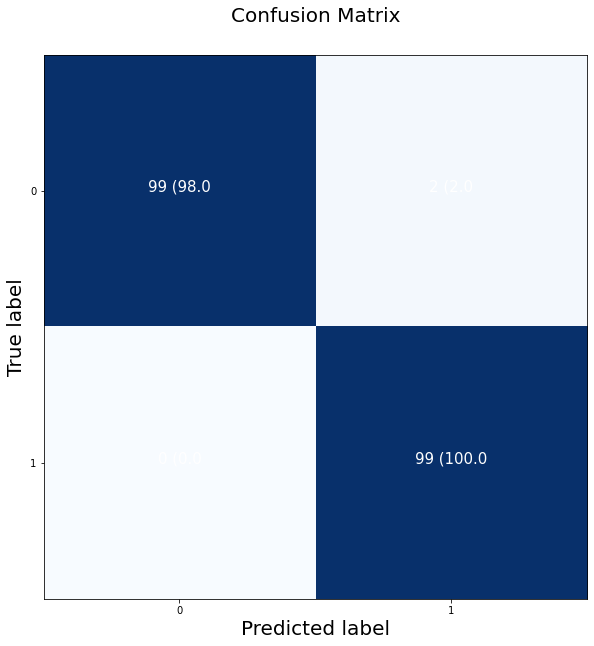

In [ ]:
import itertools

figsize=(10,10)

# Create the confusion matrix
cm  = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize it 
n_classes = cm.shape[0]

# let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)

# create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title ='Confusion Matrix',
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors threshold (cm.ax()ca.min())/2
threshold = (cm.max() + cm.min()) /2.

#Plot the text on each cell 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}",
                                horizontalalignment="center",
                                color="white" if cm[i, i] > threshold else "black",
                                size=15)        

In [ ]:
# what does itertools.product do? combines two things into each combination
import itertools
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i,j)


0 0
0 1
1 0
1 1


**Working with Larger example(multiclass classification)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# show the first tarining example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training Label:\n{train_labels[0]}')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

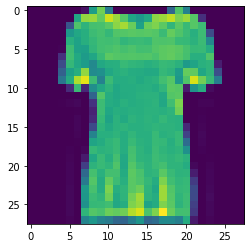

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[10])

In [ ]:
# check our sample label
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser','Pullover', 'dress','Coat',
               'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']
          
# How many classes are there (this'ill be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

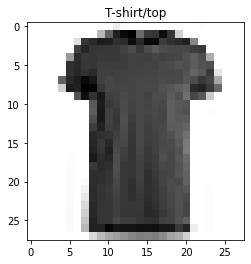

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

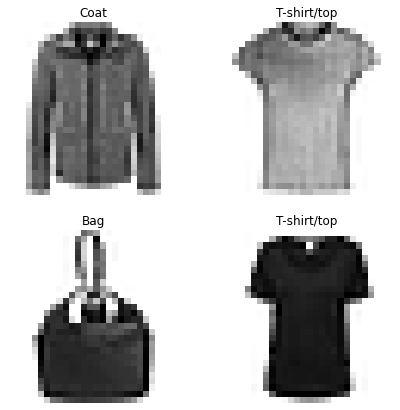

In [ ]:
# Plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
# set the random seed
tf.random.set_seed(42)
# create the model
model_11=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),  # input shape (we had to reshape 28 x 28)
                             tf.keras.layers.Dense(4 ,activation = tf.keras.activations.relu),
                             tf.keras.layers.Dense(4 ,activation = tf.keras.activations.relu),
                             tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)])  # output shape
# compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
non_norm_history = model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 4)                 3140      
                                                                 
 dense_57 (Dense)            (None, 4)                 20        
                                                                 
 dense_58 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check min and max of the training data set
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# ivide the train and test images by the max values (normalize it )
train_data = train_data / 255.0
test_data = test_data / 255.0

# check the min and max of the training dataset
train_data.min() , train_data.max()      # now data is normalize to 0 and 1

(0.0, 1.0)

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_12=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),  # input shape (we had to reshape 28 x 28)
                             tf.keras.layers.Dense(4 ,activation = 'relu'),
                             tf.keras.layers.Dense(4 ,activation = 'relu'),
                             tf.keras.layers.Dense(10,activation = 'softmax')
                             ])  
# compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
norm_history = model_12.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

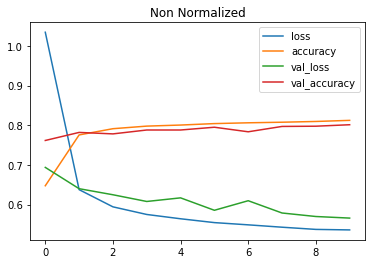

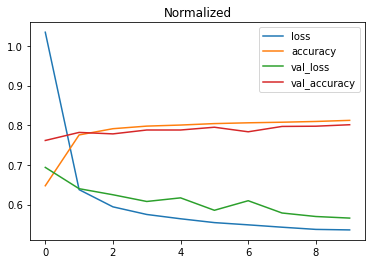

In [ ]:
import pandas as pd

#plot non normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = 'Non Normalized')

# PLot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title = 'Normalized')

In [ ]:
# # Set the random seed
# tf.random.set_seed(42)

# # Create the model
# model_13 = tf.keras.Sequential([
#                                tf.keras.layers.Dense(4, activation = 'relu'),
#                                tf.keras.layers.Dense(4, activation = 'relu'),
#                                tf.keras.layers.Dense(1, activation = 'softmax')
#                               ])

# # Compile the model# compile the model
# model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['accuracy'])

# # Create a learning rate scheduler callback - if model achieve learning rate then it stop there 
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))    # learning rate values 

# # Fit the model
# find_lr_history =  model_13.fit(train_data,
#                                 train_labels,
#                                 epochs=40,
#                                 validation_data=(test_data, test_labels),
#                                 callbacks=[lr_scheduler])

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
# Combination of linear and non-linear activation function
model_13 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')])

# compile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# create a learning rate callback scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

# fit the model
find_lr_history = model_13.fit(train_data,
                      train_labels,
                      epochs = 40, ## model is already doing pretty good
                      validation_data=(test_data,test_labels),
                      callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Find the ideal learnng rate')

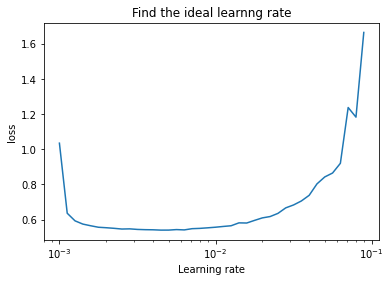

In [ ]:
# PLot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('loss')
plt.title('Find the ideal learnng rate')

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
# Combination of linear and non-linear activation function
model_14 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')])

# compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = .001),
                metrics = ['accuracy'])

# create a learning rate callback scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

# fit the model
history = model_14.fit(train_data,
                      train_labels,
                      epochs = 20, ## model is already doing pretty good
                      validation_data = (test_data, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

In [190]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize= (10,7), text_size=15):

  # Create confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_normalize = cm.astype('float') / cm.sum(axis=1)[: , np.newaxis]
  n_classes = cm.shape[0]

  # Plot the figure and make it better
  fig, ax = plt.subplots(figsize= figsize)
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Are there a list of classes ?
  if classes:
    label = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # label the axes
  ax.set(title = 'confusion matrix',
         xlabel = 'Predicted label',
         ylabel = 'Truel Label',
         xticks = np.arange(n_classes),
         yticks = np.arange(n_classes),
         xticklabels = labels,
         yticklabels = labels)
  
  # Make a X axis labels appear on the bottom 
  ax.axis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Set the threshold for differednt colors
  threshold  = cm.max()+ cm.min() / 2

  # PLot the text on each cell
  for i, j in itertools.product(range(cm.shape[0], range(cm.shape[1]))):
    plt.text(j, i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > threshold else 'black',
             size = text_size)

In [182]:
# Make a prediction with the recent model
y_probs = model_14.predict(test_data)

# view the first 5 predictions
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

In [183]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [184]:
# Convert all of the prediction from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [185]:
# Check a non prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

UnboundLocalError: ignored

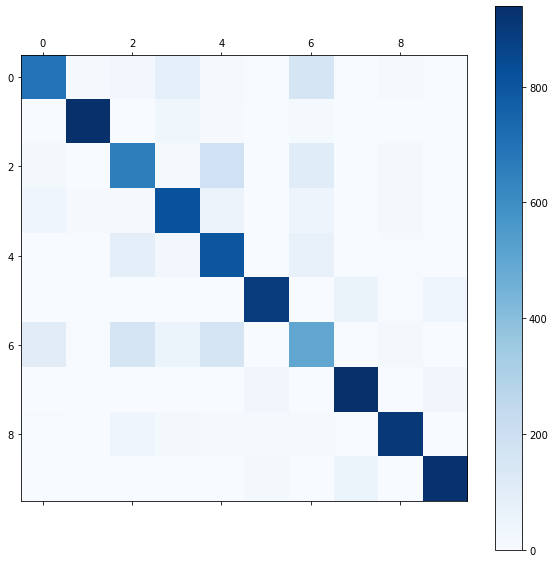

In [191]:
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (10,10),
                      text_size = 10)

In [210]:
import random 
def plot_random_image(model, images, true_labels, classes):

  # setup a random integer
  i =random.randint(0, len(images))

  # creating a prediction and targets
  target_images = images[i]
  pred_probs = model.predict(target_images.reshape(1,28,28))
  pred_labels = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  
  # Plot the target image
  plt.imshow(target_images, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_labels == true_label:
    color = 'green'
  else:
    color = 'red'
  
  # add x label inform the prediction
  plt.xlabel('Pred : {} {:2.0f}% (True : {})'.format(pred_labels,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
             color = color)

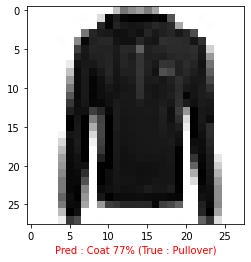

In [214]:
# Check out a random image as well as its prediction
plot_random_image(model = model_14,
                  images = test_data,
                  true_labels = test_labels,
                  classes = class_names)

In [215]:
# Find the layers of our most recent model
model_14.layers

In [217]:
model_14.layers[1]

In [219]:
# get the patterns of a layer in out network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data(28 x28) per neuron (4)
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [220]:
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

In [221]:
model_14.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_92 (Dense)            (None, 4)                 3140      
                                                                 
 dense_93 (Dense)            (None, 4)                 20        
                                                                 
 dense_94 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


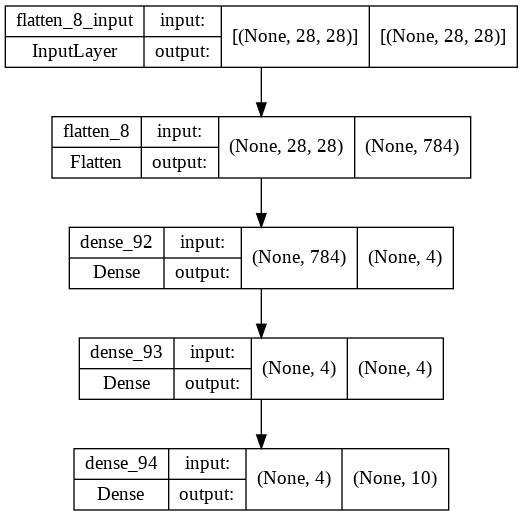

In [225]:
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)